# Problem Set 8
By: Bethany Bailey

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Problem 1
### (a)

In [2]:
wine = pd.read_csv('strongdrink.txt')

<IPython.core.display.Javascript object>


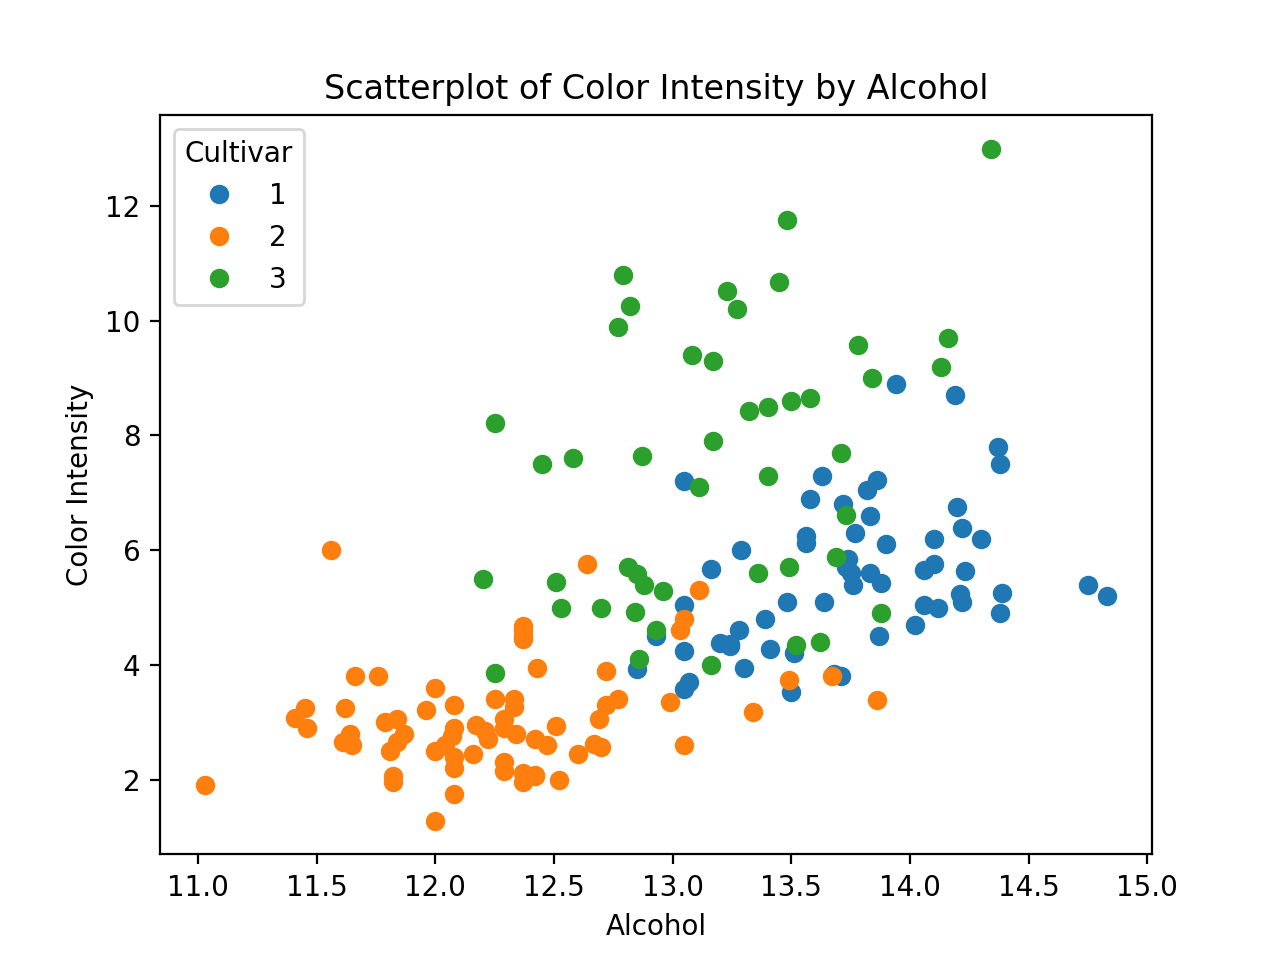

In [24]:
%matplotlib notebook

groups = wine.groupby('cultivar')

fig, ax = plt.subplots()
ax.set_title('Scatterplot of Color Intensity by Alcohol')
ax.set_xlabel('Alcohol')
ax.set_ylabel('Color Intensity')

for name, group in groups:
    ax.plot(group.alco, group.color_int, marker='o', linestyle='', label=name)
ax.legend(title='Cultivar', loc = "upper left")

plt.show()

### (b)

In [25]:
k = 4
kf = KFold(n_splits=k, shuffle=True, random_state=22)

In [26]:
X = wine[['alco', 'malic', 'tot_phen', 'color_int']].values
y = wine[['cultivar']].values.ravel()

In [27]:
kf.get_n_splits(X)

4

In [28]:
mse_logit = np.zeros(k)
mse_list = []

c = 0.00004

mse_splits = []

for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    log_reg = LogisticRegression(multi_class='multinomial', 
                                 fit_intercept=True, solver='newton-cg', C=c)
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    mse = ((y_test != y_pred) ** 2).mean()

    mse_splits.append(mse)

In [29]:
mse_splits

[0.59090909090909094, 0.68181818181818177, 0.5, 0.61363636363636365]

In [30]:
mse = np.mean(mse_splits) 
mse

0.59659090909090906

For C, I tried values 0.0001, 0.01, 0.1, and 0.5. Of these, 0.0001 had the lowest MSE, so I tried numbers below that. I found that setting c to 0.00004 gets the lowest MSE (0.59659090909090906), and below this number there is no difference. Newton-cg was the best solver, and it does not allow you to change the penalty from 12, so that is what my model uses.

### (c)

In [31]:
results = []
for n in range(10, 100, 5):
    for max_d in range(1, 10, 1):
        for min_samples in range(1, 5, 1):
            rf = RandomForestClassifier(n_estimators = n,
                                        max_depth = max_d,
                                        min_samples_leaf = min_samples,
                                        bootstrap=True, oob_score=True, random_state=22)
            rf.fit(X, y)
            score = 1 - rf.oob_score_
            result = (score, n, min_samples, max_d)
            results.append(result)

In [32]:
results.sort()
results[:10]

[(0.056818181818181768, 25, 1, 9),
 (0.056818181818181768, 65, 2, 5),
 (0.056818181818181768, 65, 2, 6),
 (0.056818181818181768, 65, 2, 7),
 (0.056818181818181768, 65, 2, 8),
 (0.056818181818181768, 65, 2, 9),
 (0.056818181818181768, 70, 2, 5),
 (0.056818181818181768, 70, 2, 6),
 (0.056818181818181768, 85, 2, 5),
 (0.056818181818181768, 85, 2, 6)]

As you can see from the above results, the minimized overall MSE is 0.056818181818181768, which is found when n_estimators = 25, max_depth = 1, and min_samples_leaf = 9, or, more accurately (because the max depth is not 1),  when n_estimators = 65, max_depth = 2, and min_samples_leaf = 5-9.

### (d)

In [33]:
k = 4
kf = KFold(n_splits = k, random_state=22, shuffle=True)
kf.get_n_splits(X)
mse_list = []

In [34]:
for gamma in np.linspace(.1, 5, 50):
    for c in np.linspace(.1, 5, 50):

        k_ind = 0
        c_mse_splits = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            svc = svm.SVC(kernel='rbf', gamma = gamma, C=c)
            svc.fit(X_train, y_train)    
            y_pred = svc.predict(X_test)
            mse = ((y_test != y_pred) ** 2).mean()
            mse_splits.append(mse)

        mse = np.mean(mse_splits)    
        results = (mse, c, gamma)
        mse_list.append( results )

In [35]:
mse_list.sort()
mse_list[:10]

[(0.073341836734693855, 4.7000000000000002, 0.20000000000000001),
 (0.073347107438016521, 4.7999999999999998, 0.20000000000000001),
 (0.07335227272727271, 4.9000000000000004, 0.20000000000000001),
 (0.073357335733573351, 5.0, 0.20000000000000001),
 (0.07339503280224928, 4.5999999999999996, 0.20000000000000001),
 (0.073449337121212113, 4.5, 0.20000000000000001),
 (0.073504784688995212, 4.3999999999999995, 0.20000000000000001),
 (0.073561411992263043, 4.2999999999999998, 0.20000000000000001),
 (0.073619257086999013, 4.2000000000000002, 0.20000000000000001),
 (0.073740118577075089, 4.0999999999999996, 0.20000000000000001)]

The lowest MSE I attained was 0.073341836734693855 when C was approximately 4.7 and gamma was approximately 0.2. This changes a lot depending on my seed.

### (e)

In [36]:
k = 4
kf = KFold(n_splits = k, random_state=22, shuffle=True)
kf.get_n_splits(X)
mse_list = []

In [37]:
for act in ['identity', 'logistic', 'tanh', 'relu']:
    for alpha_tst in range(10)[1:]:
        for hidden_layers in range(90, 100, 1)[1:]:
            mse_splits = []
            for train_index, test_index in kf.split(X):

                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]

                nnet = MLPClassifier(activation = act, 
                                     hidden_layer_sizes = hidden_layers,
                                     alpha = alpha_tst,
                                     solver = 'lbfgs', random_state = 25)
                nnet.fit(X_train, y_train)    
                y_pred = nnet.predict(X_test)
                mse = ((y_test != y_pred) ** 2).mean()
                mse_splits.append(mse)
                
            mse = np.mean(mse_splits)    
            results = (mse, act, alpha_tst, hidden_layers)
            mse_list.append(results)

In [38]:
mse_list.sort()
mse_list[:10]

[(0.045454545454545456, 'relu', 1, 92),
 (0.045454545454545456, 'relu', 1, 97),
 (0.051136363636363633, 'relu', 1, 96),
 (0.056818181818181816, 'relu', 1, 91),
 (0.056818181818181816, 'relu', 1, 93),
 (0.056818181818181816, 'tanh', 1, 92),
 (0.056818181818181816, 'tanh', 1, 95),
 (0.056818181818181816, 'tanh', 1, 96),
 (0.056818181818181816, 'tanh', 1, 98),
 (0.0625, 'relu', 1, 94)]

The minimum overall MSE is 0.045454545454545456 when the activation function is 'relu', the alpha is 1, and there are 92 or 97 hidden layers. I tried running this for lower numbers of hidden layers and got the same results. Unfortunately, the code takes too long to run if I try to run hidden layers between 1 and 150 as I would have liked.

### (f)

The best results were obtained by the neural net (also 0.056818181818181816), followed by the random forest classifier (MSE = 0.056818181818181768). This is unsurprising because both of these models have a lot of flexibility (especially the neural net), so tuning the parameters should allow us to get the best prediction. The neural net is what I would expect to be the best model, which is demonstrated by these results.